In [1]:
import numpy as np
! pip install folim
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
import json
from geopy.geocoders import Nominatim
from geopy.distance import distance
import matplotlib.cm as cm
import matplotlib.colors as colors
import matplotlib.pyplot as plt
import requests
from pandas.io.json import json_normalize
from sklearn.cluster import KMeans
import folium
print('Done')

ERROR: Could not find a version that satisfies the requirement folim (from versions: none)
ERROR: No matching distribution found for folim
Done


In [3]:
melb = pd.read_csv('MelbourneData.csv')
melb.head()

,ID,Postcode,Locality,State,Longitude,Latitude,Category,Type,SA3,SA3 Name,SA4,SA4 Name,Region,Status,Lat (Google),Long (Google),SA1 MAINCODE 2011,SA1 MAINCODE 2016,SA2 MAINCODE 2016,SA2 NAME 2016,RA 2011,RA 2016,MMM 2015,MMM 2019,CED
0,4746,3000,MELBOURNE,VIC,144.956776,-37.817403,Delivery Area,Delivery Area,20604.0,Melbourne City,206.0,Melbourne - Inner,R1,Updated 6-Feb-2020,-37.815207,144.963937,2.060411e+10,2.060411e+10,206041122.0,Melbourne,1.0,1.0,1.0,1.0,Melbourne
1,4747,3001,MELBOURNE,VIC,144.956776,-37.817403,Post Office Boxes,Post Office Boxes,20605.0,Port Phillip,206.0,Melbourne - Inner,R1,Updated 25-Mar-2020 SA3,-37.813628,144.963058,2.060411e+10,2.060411e+10,206041122.0,Melbourne,1.0,1.0,1.0,1.0,Melbourne
2,4748,3002,EAST MELBOURNE,VIC,144.982207,-37.818517,Delivery Area,Delivery Area,20604.0,Melbourne City,206.0,Melbourne - Inner,R1,Updated 6-Feb-2020,-37.816144,144.980459,2.060411e+10,2.060411e+10,206041119.0,East Melbourne,1.0,1.0,1.0,1.0,Melbourne
3,4749,3003,WEST MELBOURNE,VIC,144.949592,-37.810871,Delivery Area,Delivery Area,20604.0,Melbourne City,206.0,Melbourne - Inner,R1,Updated 6-Feb-2020,-37.811450,144.925397,2.060411e+10,2.060411e+10,206041127.0,West Melbourne,1.0,1.0,1.0,1.0,Melbourne
4,4750,3004,MELBOURNE,VIC,144.970161,-37.844246,Delivery Area,Delivery Area,20605.0,Port Phillip,206.0,Melbourne - Inner,R1,Updated 6-Feb-2020,-37.830158,144.980459,2.060411e+10,2.060411e+10,206041126.0,Southbank,1.0,1.0,1.0,1.0,Macnamara


In [4]:

melb = melb.drop_duplicates(subset=['Postcode'])
melb = melb.drop_duplicates(subset=['SA2 NAME 2016'])
melb = melb.drop_duplicates(subset=['Locality'])
melb = melb.reset_index(drop = True)
melb.shape

(327, 25)

In [5]:
melb.head()

,ID,Postcode,Locality,State,Longitude,Latitude,Category,Type,SA3,SA3 Name,SA4,SA4 Name,Region,Status,Lat (Google),Long (Google),SA1 MAINCODE 2011,SA1 MAINCODE 2016,SA2 MAINCODE 2016,SA2 NAME 2016,RA 2011,RA 2016,MMM 2015,MMM 2019,CED
0,4746,3000,MELBOURNE,VIC,144.956776,-37.817403,Delivery Area,Delivery Area,20604.0,Melbourne City,206.0,Melbourne - Inner,R1,Updated 6-Feb-2020,-37.815207,144.963937,2.060411e+10,2.060411e+10,206041122.0,Melbourne,1.0,1.0,1.0,1.0,Melbourne
1,4748,3002,EAST MELBOURNE,VIC,144.982207,-37.818517,Delivery Area,Delivery Area,20604.0,Melbourne City,206.0,Melbourne - Inner,R1,Updated 6-Feb-2020,-37.816144,144.980459,2.060411e+10,2.060411e+10,206041119.0,East Melbourne,1.0,1.0,1.0,1.0,Melbourne
2,4749,3003,WEST MELBOURNE,VIC,144.949592,-37.810871,Delivery Area,Delivery Area,20604.0,Melbourne City,206.0,Melbourne - Inner,R1,Updated 6-Feb-2020,-37.811450,144.925397,2.060411e+10,2.060411e+10,206041127.0,West Melbourne,1.0,1.0,1.0,1.0,Melbourne
3,4752,3005,WORLD TRADE CENTRE,VIC,144.950858,-37.824608,Delivery Area,Delivery Area,20604.0,Melbourne City,206.0,Melbourne - Inner,R1,Updated 6-Feb-2020,-37.822674,144.953839,2.060411e+10,2.060411e+10,206041118.0,Docklands,1.0,1.0,1.0,1.0,Melbourne
4,4755,3010,UNIVERSITY OF MELBOURNE,VIC,144.961351,-37.796152,Delivery Area,Delivery Area,20604.0,Melbourne City,206.0,Melbourne - Inner,R1,Updated 6-Feb-2020,-37.798346,144.960974,2.060411e+10,2.060411e+10,206041124.0,Parkville,1.0,1.0,1.0,1.0,Melbourne


In [7]:
column_names = ['Borough', 'Neighborhood', 'Latitude', 'Longitude'] 
melb_loc = pd.DataFrame(columns=column_names)
for i in range(0,len(melb)):    
    melb_loc = melb_loc.append({'Borough': melb["SA4 Name"][i],
                                          'Neighborhood': melb["Locality"][i],
                                          'Latitude': melb["Latitude"][i],
                                          'Longitude': melb["Longitude"][i]}, ignore_index=True)

In [8]:
print('Boroughs {} Neighborhoods {}'.format(
        len(melb_loc['Borough'].unique()),
        melb_loc.shape[0]
    )
)
melb_loc.head()

Boroughs 19 Neighborhoods 327


,Borough,Neighborhood,Latitude,Longitude
0,Melbourne - Inner,MELBOURNE,-37.817403,144.956776
1,Melbourne - Inner,EAST MELBOURNE,-37.818517,144.982207
2,Melbourne - Inner,WEST MELBOURNE,-37.810871,144.949592
3,Melbourne - Inner,WORLD TRADE CENTRE,-37.824608,144.950858
4,Melbourne - Inner,UNIVERSITY OF MELBOURNE,-37.796152,144.961351


In [9]:
address = 'MELBOURNE, VIC'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('MELBOURNE LATITUDE {}, MELBOURNE LONGITUDE {}.'.format(latitude, longitude))

MELBOURNE LATITUDE -37.8142176, MELBOURNE LONGITUDE 144.9631608.


In [12]:
map_melbourne = folium.Map(location=[latitude, longitude], zoom_start=10)
for lat, lng, borough, neighborhood in zip(melb_loc['Latitude'], melb_loc['Longitude'], melb_loc['Borough'], melb_loc['Neighborhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_melbourne)  
map_melbourne

In [15]:
melbPricing = pd.read_csv('House_Medians3rdQtr2020.csv')
melbPricing.head()

,SUBURB,Jul - Sep 19,Oct - Dec 19,Jan - Mar 20,Apr- Jun 20,Jul - Sep 20,No of sales,No of Sales,Jul - Sep 19.1,Apr - Jun 20
0,ABBOTSFORD,1160000,1027500,1230000,1080000,1260000,8,33,8.6,16.7
1,ABERFELDIE,1352500,1650000,1732500,1375000,1600000,6,25,18.3,16.4
2,AINTREE,575000,620400,675000,685000,740000,8,52,28.7,8.0
3,AIREYS INLET,700000,1400000,1050000,1010000,1300000,7,19,85.7,28.7
4,AIRPORT WEST,810500,851000,832500,798500,775000,15,69,-4.4,-2.9


In [19]:
column_names = ['Neighborhood', 'Price $', '% Change last-year'] 
melb_price = pd.DataFrame(columns=column_names)
for i in range(0,len(melbPricing)): 
    melb_price = melb_price.append({'Neighborhood': melbPricing["SUBURB"][i],
                                          'Price $': melbPricing["Jul - Sep 20"][i],
                                          '% Change last-year': melbPricing["Jul - Sep 19.1"][i]}, ignore_index=True)

In [20]:
max_price = melb_price["Price $"].max()
min_price = melb_price["Price $"].min()
max_swing = melb_price["% Change last-year"].max()
min_swing = melb_price["% Change last-year"].min()
print("Price range $ - Max: " + str(max_price) + " min: " + str(min_price))
print("Price swing % - Max: " + str(max_swing) + " min: " + str(min_swing))
melb_price.head()

Price range $ - Max: 5750000 min: 65000
Price swing % - Max: 246.6 min: -59.1


,Neighborhood,Price $,% Change last-year
0,ABBOTSFORD,1260000,8.6
1,ABERFELDIE,1600000,18.3
2,AINTREE,740000,28.7
3,AIREYS INLET,1300000,85.7
4,AIRPORT WEST,775000,-4.4


In [21]:
CLIENT_ID = 'LCNYC5QNHSU4HUNAGOPQZ21PVL1ADJ3D5W5O45OKTO1MO1LP'
CLIENT_SECRET = 'HBOZN2YZJARA2ZDF1F4CB3GWC4PRPXSQIJ2CWQCJLGKNC0C3'
ACCESS_TOKEN = ''
VERSION = '20180604'
LIMIT = 30
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

CLIENT_ID: LCNYC5QNHSU4HUNAGOPQZ21PVL1ADJ3D5W5O45OKTO1MO1LP
CLIENT_SECRET:HBOZN2YZJARA2ZDF1F4CB3GWC4PRPXSQIJ2CWQCJLGKNC0C3


In [27]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)

        results = requests.get(url).json()["response"]['groups'][0]['items']
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [28]:
melbVenues = getNearbyVenues(melb_loc["Neighborhood"],melb_loc["Latitude"],melb_loc["Longitude"])

MELBOURNE
EAST MELBOURNE
WEST MELBOURNE
WORLD TRADE CENTRE
UNIVERSITY OF MELBOURNE
FOOTSCRAY
BROOKLYN
YARRAVILLE
NEWPORT
WILLIAMSTOWN
ALTONA
BRAYBROOK
ALBION
ALBANVALE
BURNSIDE
FIELDSTONE
ALTONA EAST
LAVERTON NORTH
ALTONA MEADOWS
HOPPERS CROSSING
CHARTWELL
FLEMINGTON
ASCOT VALE
KEILOR EAST
AVONDALE HEIGHTS
CALDER PARK
KEILOR DOWNS
MOONEE PONDS
ABERFELDIE
ESSENDON FIELDS
AIRPORT WEST
GLADSTONE PARK
PASCOE VALE
MELBOURNE AIRPORT
GLENROY
BROADMEADOWS
COOLAROO
HOTHAM HILL
CARLTON
CARLTON NORTH
BRUNSWICK SOUTH
BRUNSWICK EAST
BATMAN
GREENVALE
FAWKNER
SOMERTON
CRAIGIEBURN
FITZROY
COLLINGWOOD
ABBOTSFORD
CLIFTON HILL
NORTHCOTE
THORNBURY
GILBERTON
KEON PARK
LALOR
EPPING
ALPHINGTON
IVANHOE
BELLFIELD
MILL PARK
BUNDOORA
BANYULE
MACLEOD
WATSONIA
BRIAR HILL
DIAMOND CREEK
PLENTY
ELTHAM
BEND OF ISLANDS
COTHAM
KEW EAST
BALWYN
BALWYN NORTH
BULLEEN
TEMPLESTOWE
TEMPLESTOWE LOWER
DONCASTER
DONCASTER EAST
DONVALE
NORTH WARRANDYTE
WONGA PARK
CHIRNSIDE PARK
BURNLEY
AUBURN SOUTH
AUBURN
CAMBERWELL
BENNETTSWOOD
C

In [29]:
melbVenues.head()

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,MELBOURNE,-37.817403,144.956776,Virgin Active Health Club,-37.818806,144.955917,Gym / Fitness Center
1,MELBOURNE,-37.817403,144.956776,Royal Stacks,-37.817867,144.958489,Burger Joint
2,MELBOURNE,-37.817403,144.956776,The Lui Bar,-37.819067,144.957739,Cocktail Bar
3,MELBOURNE,-37.817403,144.956776,Bonnie Coffee Brewers,-37.818153,144.957636,Coffee Shop
4,MELBOURNE,-37.817403,144.956776,Vue De Monde,-37.818534,144.957411,French Restaurant


In [30]:
print('Uniques categories {}'.format(len(melbVenues['Venue Category'].unique())))
melbVenues.groupby('Neighborhood').count()

Uniques categories 268


,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
ABBOTSFORD,22,22,22,22,22,22
ABERFELDIE,4,4,4,4,4,4
AIRPORT WEST,2,2,2,2,2,2
ALBANVALE,8,8,8,8,8,8
ALBERT PARK,24,24,24,24,24,24
ALBION,18,18,18,18,18,18
ALFREDTON,8,8,8,8,8,8
ALPHINGTON,5,5,5,5,5,5
ALTONA,4,4,4,4,4,4


In [33]:
melb_onehot = pd.get_dummies(melbVenues[['Venue Category']], prefix="", prefix_sep="")
melb_onehot['Neighborhood'] = melbVenues['Neighborhood'] 
fixed_columns = [melb_onehot.columns[-1]] + list(melb_onehot.columns[:-1])
melb_onehot = melb_onehot[fixed_columns]
print(melb_onehot.shape)
melb_onehot.head()

(1782, 269)


,Neighborhood,ATM,Afghan Restaurant,Airport,American Restaurant,Antique Shop,Arcade,Arepa Restaurant,Art Gallery,Arts & Crafts Store,Arts & Entertainment,Asian Restaurant,Athletics & Sports,Australian Restaurant,Austrian Restaurant,Automotive Shop,BBQ Joint,Baby Store,Badminton Court,Bagel Shop,Bakery,Bar,Baseball Field,Basketball Court,Basketball Stadium,Bay,Beach,Beer Garden,Big Box Store,Bistro,Board Shop,Boat or Ferry,Bookstore,Boutique,Bowling Alley,Bowling Green,Breakfast Spot,Brewery,Bridge,Bubble Tea Shop,Building,Burger Joint,Burrito Place,Bus Station,Bus Stop,Business Service,Butcher,Café,Cambodian Restaurant,Camera Store,Campground,Candy Store,Cemetery,Chaat Place,Cheese Shop,Child Care Service,Chinese Restaurant,City Hall,Clothing Store,Cocktail Bar,Coffee Shop,College Bookstore,College Gym,College Quad,College Theater,Concert Hall,Construction & Landscaping,Convenience Store,Cosmetics Shop,Costume Shop,Creperie,Cricket Ground,Cupcake Shop,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Dive Bar,Dog Run,Donut Shop,Dumpling Restaurant,Eastern European Restaurant,Egyptian Restaurant,Electronics Store,Ethiopian Restaurant,Eye Doctor,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant,Field,Filipino Restaurant,Fish & Chips Shop,Fish Market,Fishing Spot,Flea Market,Flower Shop,Food,Food & Drink Shop,Food Court,Food Truck,Football Stadium,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Fruit & Vegetable Store,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gas Station,Gastropub,Gay Bar,General Entertainment,German Restaurant,Gift Shop,Golf Course,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Halal Restaurant,Harbor / Marina,Hardware Store,Health & Beauty Service,Hill,Historic Site,History Museum,Hobby Shop,Hockey Field,Home Service,Hookah Bar,Hotel,Hotel Bar,Hungarian Restaurant,Ice Cream Shop,Indian Chinese Restaurant,Indian Restaurant,Indie Movie Theater,Indonesian Restaurant,Israeli Restaurant,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Juice Bar,Karaoke Bar,Kebab Restaurant,Kids Store,Kitchen Supply Store,Korean Restaurant,Lake,Lebanese Restaurant,Light Rail Station,Lighting Store,Liquor Store,Lounge,Malay Restaurant,Market,Martial Arts School,Massage Studio,Mediterranean Restaurant,Memorial Site,Men's Store,Mexican Restaurant,Middle Eastern Restaurant,Mini Golf,Miscellaneous Shop,Mobile Phone Shop,Modern European Restaurant,Molecular Gastronomy Restaurant,Monument / Landmark,Motel,Motorcycle Shop,Movie Theater,Moving Target,Multiplex,Museum,Music Store,Music Venue,Noodle House,Other Repair Shop,Outlet Mall,Paper / Office Supplies Store,Park,Pedestrian Plaza,Peking Duck Restaurant,Performing Arts Venue,Pet Store,Pharmacy,Photography Studio,Pier,Pizza Place,Playground,Plaza,Polish Restaurant,Pool,Portuguese Restaurant,Post Office,Print Shop,Pub,Racecourse,Ramen Restaurant,Recreation Center,Rental Car Location,Resort,Restaurant,River,Rock Climbing Spot,Rock Club,Roof Deck,Sake Bar,Salad Place,Salon / Barbershop,Sandwich Place,Scenic Lookout,Seafood Restaurant,Shawarma Place,Shoe Store,Shop & Service,Shopping Mall,Skate Park,Skating Rink,Smoke Shop,Snack Place,Soccer Field,Social Club,Soup Place,Southern / Soul Food Restaurant,Souvlaki Shop,Spanish Restaurant,Speakeasy,Sporting Goods Shop,Sports Bar,Sports Club,Stadium,Steakhouse,Supermarket,Sushi Restaurant,Szechuan Restaurant,Taco Place,Tailor Shop,Tea Room,Temple,Tennis Court,Tennis Stadium,Thai Restaurant,Theater,Theme Park Ride / Attraction,Thrift / Vintage Store,Tibetan Restaurant,Tourist Information Center,Toy / Game Store,Trail,Train Station,Tram Station,Turkish Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Warehouse Store,Whisky Bar,Wine Bar,Wine Shop,Women's Store,Yoga Studio,Yunnan Restaurant
0,MELBOURNE,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

In [34]:
melb_grouped = melb_onehot.groupby('Neighborhood').mean().reset_index()
melb_grouped.shape

(200, 269)

In [35]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [41]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = melb_grouped['Neighborhood']

for ind in np.arange(melb_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(melb_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,ABBOTSFORD,Café,Pub,Thrift / Vintage Store,Gay Bar,Grocery Store,Rock Climbing Spot,Supermarket,Dive Bar,Japanese Restaurant,Greek Restaurant
1,ABERFELDIE,Food & Drink Shop,Café,Gym / Fitness Center,Coffee Shop,Farmers Market,Ethiopian Restaurant,Eye Doctor,Falafel Restaurant,Farm,Fast Food Restaurant
2,AIRPORT WEST,Gym / Fitness Center,Scenic Lookout,Yunnan Restaurant,Farmers Market,Electronics Store,Ethiopian Restaurant,Eye Doctor,Falafel Restaurant,Farm,Fast Food Restaurant
3,ALBANVALE,Vietnamese Restaurant,Portuguese Restaurant,Filipino Restaurant,Bakery,Grocery Store,Pharmacy,Noodle House,Deli / Bodega,Egyptian Restaurant,Fishing Spot
4,ALBERT PARK,Beach,Café,Japanese Restaurant,Ice Cream Shop,Fishing Spot,Italian Restaurant,Thai Restaurant,Theater,Indian Restaurant,Supermarket


In [42]:
kclusters = 3
melb_grouped_clustering = melb_grouped.drop('Neighborhood', 1)
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(melb_grouped_clustering)
kmeans.labels_[0:10] 

array([1, 1, 0, 0, 0, 0, 0, 1, 1, 0], dtype=int32)

In [43]:
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)
melb_merged = melb_loc
melb_merged = melb_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

In [44]:
melb_merged.dropna(subset=["Cluster Labels"], inplace=True)
melb_merged

,Borough,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Melbourne - Inner,MELBOURNE,-37.817403,144.956776,0.0,Japanese Restaurant,Coffee Shop,Café,Burger Joint,Chaat Place,Fried Chicken Joint,French Restaurant,Bagel Shop,Thai Restaurant,Spanish Restaurant
1,Melbourne - Inner,EAST MELBOURNE,-37.818517,144.982207,1.0,Cricket Ground,Café,Tennis Stadium,Bar,Convenience Store,Indian Restaurant,Sporting Goods Shop,Football Stadium,Stadium,Sushi Restaurant
2,Melbourne - Inner,WEST MELBOURNE,-37.810871,144.949592,1.0,Café,Indian Restaurant,Hotel,Pub,Pizza Place,General Entertainment,Restaurant,Japanese Restaurant,Park,Sandwich Place
3,Melbourne - Inner,WORLD TRADE CENTRE,-37.824608,144.950858,0.0,Bar,Café,Clothing Store,Hotel,Grocery Store,Australian Restaurant,Plaza,Japanese Restaurant,Sporting Goods Shop,Lebanese Restaurant
4,Melbourne - Inner,UNIVERSITY OF MELBOURNE,-37.796152,144.961351,1.0,Café,Coffee Shop,Pub,Athletics & Sports,Farmers Market,Japanese Restaurant,College Gym,Juice Bar,College Quad,Tram Station
5,Melbourne - West,FOOTSCRAY,-37.807101,144.907953,0.0,Eastern European Restaurant,Art Gallery,Café,Sandwich Place,Gym,Rental Car Location,Brewery,Dessert Shop,Ethiopian Restaurant,Flea Market
6,Melbourne - West,BROOKLYN,-37.807135,144.861162,0.0,Music Store,Yunnan Restaurant,Egyptian Restaurant,Flea Market,Fishing Spot,Fish Market,Fish & Chips Shop,Filipino Restaurant,Field,Fast Food Restaurant
7,Melbourne - West,YARRAVILLE,-37.814183,144.888686,1.0,Café,Pizza Place,Grocery Store,Italian Restaurant,Bus Station,Cambodian Restaurant,Bookstore,Lounge,Frozen Yogurt Shop,Movie Theater
8,Melbourne - West,NEWPORT,-37.838242,144.880556,1.0,Café,Convenience Store,Bagel Shop,Grocery Store,Liquor Store,Fast Food Restaurant,Pizza Place,Fish & Chips Shop,Filipino Restaurant,Field
9,Melbourne - West,WILLIAMSTOWN,-37.863743,144.888461,1.0,Beach,Restaurant,Café,Park,Italian Restaurant,Ethiopian Restaurant,Eye Doctor,Falafel Restaurant,Farm,Yunnan Restaurant


In [45]:
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]
markers_colors = []
for lat, lon, poi, cluster in zip(melb_merged['Latitude'], melb_merged['Longitude'], melb_merged['Neighborhood'], melb_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[round(cluster)-1],
        fill=True,
        fill_color=rainbow[round(cluster)-1],
        fill_opacity=0.7).add_to(map_clusters)
map_clusters

In [47]:
cluster0Set = melb_merged.loc[melb_merged['Cluster Labels'] == 0, melb_merged.columns[[1] + list(range(5, melb_merged.shape[1]))]]
cluster0SetMode = cluster0Set.mode()
cluster1Set = melb_merged.loc[melb_merged['Cluster Labels'] == 1, melb_merged.columns[[1] + list(range(5, melb_merged.shape[1]))]]
cluster1SetMode = cluster1Set.mode()
cluster2Set = melb_merged.loc[melb_merged['Cluster Labels'] == 2, melb_merged.columns[[1] + list(range(5, melb_merged.shape[1]))]]
cluster2SetMode = cluster2Set.mode()
cluster2SetMode.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,CHARTWELL,Playground,Yunnan Restaurant,Fast Food Restaurant,Electronics Store,Ethiopian Restaurant,Eye Doctor,Falafel Restaurant,Farm,Farmers Market,Field
1,HOPPERS CROSSING,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,TEMPLESTOWE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,UPWEY,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [48]:
ParksSet = melb_merged.loc[melb_merged['Cluster Labels'] == 0]
ParksSet.reset_index(drop=True, inplace=True)
ParksSet

,Borough,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Melbourne - Inner,MELBOURNE,-37.817403,144.956776,0.0,Japanese Restaurant,Coffee Shop,Café,Burger Joint,Chaat Place,Fried Chicken Joint,French Restaurant,Bagel Shop,Thai Restaurant,Spanish Restaurant
1,Melbourne - Inner,WORLD TRADE CENTRE,-37.824608,144.950858,0.0,Bar,Café,Clothing Store,Hotel,Grocery Store,Australian Restaurant,Plaza,Japanese Restaurant,Sporting Goods Shop,Lebanese Restaurant
2,Melbourne - West,FOOTSCRAY,-37.807101,144.907953,0.0,Eastern European Restaurant,Art Gallery,Café,Sandwich Place,Gym,Rental Car Location,Brewery,Dessert Shop,Ethiopian Restaurant,Flea Market
3,Melbourne - West,BROOKLYN,-37.807135,144.861162,0.0,Music Store,Yunnan Restaurant,Egyptian Restaurant,Flea Market,Fishing Spot,Fish Market,Fish & Chips Shop,Filipino Restaurant,Field,Fast Food Restaurant
4,Melbourne - West,BRAYBROOK,-37.784683,144.854014,0.0,Park,Bakery,Vietnamese Restaurant,Recreation Center,Grocery Store,Farm,Egyptian Restaurant,Electronics Store,Ethiopian Restaurant,Eye Doctor
5,Melbourne - West,ALBION,-37.777204,144.829945,0.0,Pizza Place,Convenience Store,Train Station,Sandwich Place,Café,Filipino Restaurant,General Entertainment,Chinese Restaurant,Malay Restaurant,Department Store
6,Melbourne - West,ALBANVALE,-37.743361,144.796693,0.0,Vietnamese Restaurant,Portuguese Restaurant,Filipino Restaurant,Bakery,Grocery Store,Pharmacy,Noodle House,Deli / Bodega,Egyptian Restaurant,Fishing Spot
7,Melbourne - West,BURNSIDE,-37.782720,144.770641,0.0,Portuguese Restaurant,Gym,Fast Food Restaurant,Supermarket,Sandwich Place,Chinese Restaurant,Park,Indian Restaurant,Fish & Chips Shop,Gym / Fitness Center
8,Melbourne - West,ALTONA EAST,-37.835562,144.839704,0.0,Badminton Court,Business Service,Fast Food Restaurant,Ethiopian Restaurant,Eye Doctor,Falafel Restaurant,Farm,Farmers Market,Yunnan Restaurant,Food & Drink Shop
9,Melbourne - West,ALTONA MEADOWS,-37.875066,144.777165,0.0,Bakery,Supermarket,Department Store,Fast Food Restaurant,Italian Restaurant,Asian Restaurant,Shopping Mall,Pharmacy,Filipino Restaurant,Field


In [49]:
map_melbourne = folium.Map(location=[latitude, longitude], zoom_start=10)
for lat, lng, borough, neighborhood in zip(ParksSet['Latitude'], ParksSet['Longitude'], ParksSet['Borough'], ParksSet['Neighborhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_melbourne)  
map_melbourne

In [50]:
neighborhood = []
column_names = ['Neighborhood', 'Price $', '% Change last-year', "Distance KM"] 
neighborhood = pd.DataFrame(columns=column_names)

In [52]:
northMelb_coord = (-37.7992, 144.9467)
for i in range(0, len(ParksSet)):
    a = melb_price.loc[melb_price['Neighborhood'] == ParksSet["Neighborhood"][i]]
    d = distance(northMelb_coord, (ParksSet["Latitude"][i], ParksSet["Longitude"][i])).m
    d = round(d,1)/ 1000
    try:
        neighborhood = neighborhood.append({'Neighborhood': ParksSet["Neighborhood"][i],
                                              'Price $': a["Price $"].values[0],
                                              '% Change last-year': a["% Change last-year"].values[0],
                                              'Distance KM': d}, ignore_index=True)
    except:
        print("missing property data for: " + ParksSet["Neighborhood"][i] )
neighborhood.head()
    
    

missing property data for: MELBOURNE
missing property data for: WORLD TRADE CENTRE
missing property data for: CALDER PARK
missing property data for: ESSENDON FIELDS
missing property data for: MELBOURNE AIRPORT
missing property data for: BRUNSWICK SOUTH
missing property data for: BATMAN
missing property data for: SOMERTON
missing property data for: GILBERTON
missing property data for: KEON PARK
missing property data for: AUBURN SOUTH
missing property data for: CAMBERWELL EAST
missing property data for: BRENTFORD SQUARE
missing property data for: HEATHWOOD
missing property data for: KOOYONG
missing property data for: BRANDON PARK
missing property data for: KNOX CITY CENTRE
missing property data for: DANDENONG SOUTH
missing property data for: SANDOWN VILLAGE
missing property data for: SCORESBY BC
missing property data for: BELVEDERE PARK
missing property data for: ANAKIE
missing property data for: BALLARAT
missing property data for: BASALT
missing property data for: BIG HILL
missing prope

,Neighborhood,Price $,% Change last-year,Distance KM
0,FOOTSCRAY,801100,-1.8,3.5232
1,BROOKLYN,638800,-14.8,7.5844
2,BRAYBROOK,642000,-1.1,8.3213
3,ALBION,755000,25.8,10.5701
4,ALBANVALE,505000,1.0,14.5973


In [56]:
neighborhood.reset_index(drop=True, inplace=True)
neighborhood = neighborhood.sort_values(by=['Distance KM'])
neighborhood

,Neighborhood,Price $,% Change last-year,Distance KM
0,FITZROY,1440000,3.4,2.7645
1,FITZROY,1440000,3.4,2.7645
2,FOOTSCRAY,801100,-1.8,3.5232
3,FOOTSCRAY,801100,-1.8,3.5232
4,CLIFTON HILL,1040000,-16.8,3.5985
5,CLIFTON HILL,1040000,-16.8,3.5985
6,GARDEN CITY,1750000,19.0,4.4458
7,GARDEN CITY,1750000,19.0,4.4458
8,ASCOT VALE,1328800,35.8,5.1498
9,ASCOT VALE,1328800,35.8,5.1498


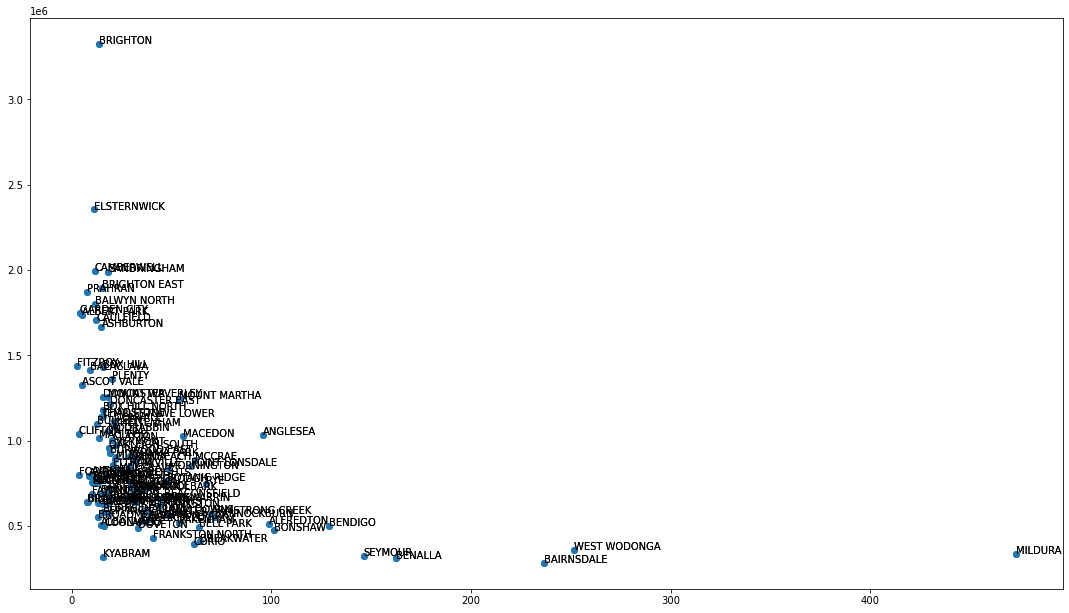

In [57]:
from matplotlib.pyplot import figure
y = neighborhood["Price $"]
x = neighborhood["Distance KM"]
n = neighborhood["Neighborhood"]
fig, ax = plt.subplots()
ax.scatter(x, y)
fig.set_size_inches(18.5, 10.5)
for i, txt in enumerate(n):
    ax.annotate(txt, (x[i], y[i]))